## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

## Task 1

#### Importing Train Set File

In [2]:
train_set = []
with open('train-perceptron.txt','r') as file:
    new_reader = csv.reader(file,delimiter=' ')
    for row in new_reader:
        train_set.append(row)

In [3]:
for i in range(len(train_set)):
    for j in range(len(train_set[i])):
        train_set[i][j] = float(train_set[i][j])

#### Class A and Class B fixing

In [4]:
a = []
b = []
for train in train_set:
    if train[2]==1:
        a.append([train[0], train[1]])
    elif train[2]==2:
        b.append([train[0], train[1]])
class_a = np.array(a)
class_b = np.array(b)

#### Displaying The Plot

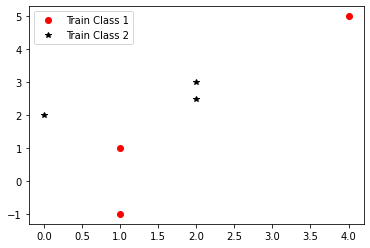

In [5]:
plt.plot(class_a[:,0:1],class_a[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(class_b[:,0:1],class_b[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.legend()
plt.show()

## Task 2

In [6]:
y = np.zeros((6,6))
y = [[class_a[0][0]*class_a[0][0], class_a[0][1]*class_a[0][1], class_a[0][0]*class_a[0][1], class_a[0][0], class_a[0][1], 1],
    [class_a[1][0]*class_a[1][0], class_a[1][1]*class_a[1][1], class_a[1][0]*class_a[1][1], class_a[1][0], class_a[1][1], 1],
    [class_a[2][0]*class_a[2][0], class_a[2][1]*class_a[2][1], class_a[2][0]*class_a[2][1], class_a[2][0], class_a[2][1], 1],
    
     [-class_b[0][0]*class_b[0][0], -class_b[0][1]*class_b[0][1], -class_b[0][0]*class_b[0][1], -class_b[0][0], -class_b[0][1], -1],
    [-class_b[1][0]*class_b[1][0], -class_b[1][1]*class_b[1][1], -class_b[1][0]*class_b[1][1], -class_b[1][0], -class_b[1][1], -1],
    [-class_b[2][0]*class_b[2][0], -class_b[2][1]*class_b[2][1], -class_b[2][0]*class_b[2][1], -class_b[2][0], -class_b[2][1], -1]
    ]
y = np.array(y)
y

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [-0.  , -4.  , -0.  , -0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

## Task 3

#### One at A Time

In [7]:
w = np.ones((1,6))
alpha = 0.1
flag = 0
cnt = 0
g = 0
while cnt<200:
    cnt = cnt+1
    flag = 0
    for i in range(6):
        g = np.matmul(y[i, :],w.transpose())
        if g<=0:
            w = w+alpha*y[i, :]
        else:
            flag = flag+1
    if flag==6:
        break
print(cnt)

6


#### Many at A Time

In [8]:
w2 = np.ones((1, 6))
alpha2 = 0.1
flag2 = 0
cnt2 = 0
temp = 0
g2 = 0
while cnt2<200:
    cnt2 = cnt2+1
    flag2 = 0
    temp = 0
    for i in range(6):
        g2 = np.matmul(y[i, :], w2.transpose())
        if g2<=0:
            temp = temp + y[i, :]
        else:
            flag2 = flag2+1
    if flag2==6:
        break
    w2 = w2+alpha2*temp
print(cnt2)

102


## Task 4

#### All One

In [9]:
## One at A Time
one_at_ones = []
one_at_alpha = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w = np.ones((1,6))
    cnt = 0
    flag = 0
    g = 0
    while cnt<200:
        cnt = cnt+1
        flag = 0
        for i in range(6):
            g = np.matmul(y[i, :],w.transpose())
            if g<=0:
                w = w+alpha*y[i, :]
            else:
                flag = flag+1
        if flag==6:
            break
    one_at_alpha.append(alpha)
    one_at_ones.append(cnt)

## Many at A Time
many_at_ones = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w2 = np.ones((1, 6))
    alpha2 = 0.1
    flag2 = 0
    cnt2 = 0
    temp = 0
    g2 = 0
    while cnt2<200:
        cnt2 = cnt2+1
        flag2 = 0
        temp = 0
        for i in range(6):
            g2 = np.matmul(y[i, :], w2.transpose())
            if g2<=0:
                temp = temp + y[i, :]
            else:
                flag2 = flag2+1
        if flag2==6:
            break
        w2 = w2+alpha*temp
    many_at_ones.append(cnt2)
df = pd.DataFrame({"Alpha (Learning Rate)":one_at_alpha, "One at a Time":one_at_ones, "Many at a Time":many_at_ones})
df

,Alpha (Learning Rate),One at a Time,Many at a Time
0,0.1,6,102
1,0.2,92,104
2,0.3,104,91
3,0.4,106,116
4,0.5,93,105
5,0.6,93,114
6,0.7,108,91
7,0.8,115,91
8,0.9,94,105
9,1.0,94,93


###### Plotting

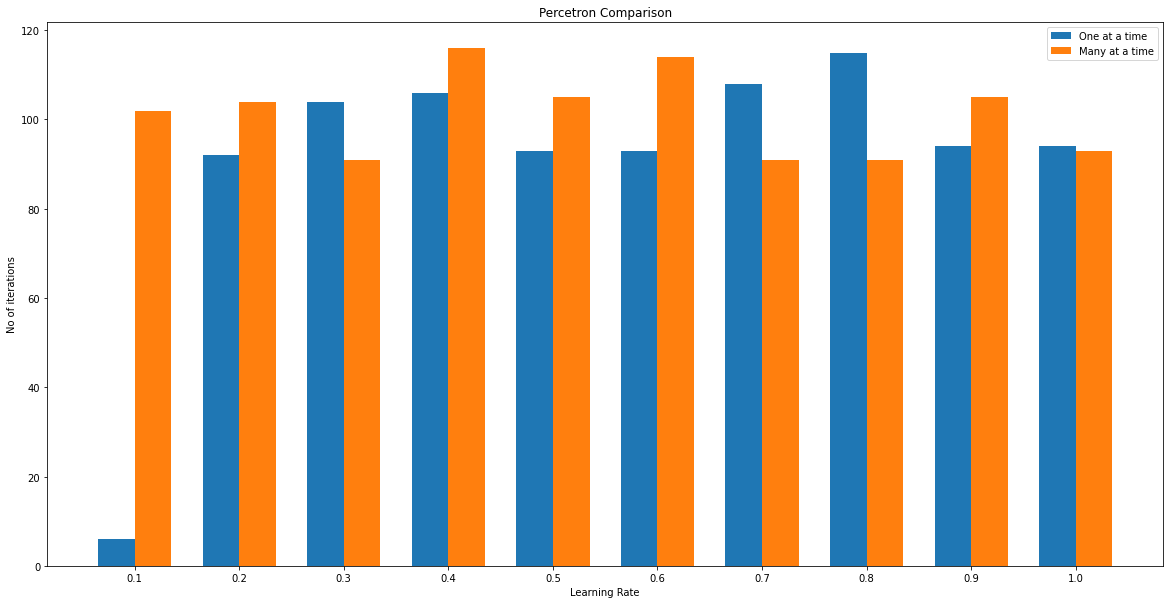

In [11]:
labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
one_at_time_ones = one_at_ones
many_at_time_ones = many_at_ones

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one_at_time_ones, width, label='One at a time')
rects2 = ax.bar(x + width/2, many_at_time_ones, width, label='Many at a time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of iterations')
ax.set_xlabel('Learning Rate')
ax.set_title('Percetron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.rcParams["figure.figsize"] = (20,10)

plt.show()

#### All Zeros

In [12]:
## One at A Time
one_at_zeros = []
one_at_alpha = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w = np.zeros((1,6))
    cnt = 0
    flag = 0
    g = 0
    while cnt<200:
        cnt = cnt+1
        flag = 0
        for i in range(6):
            g = np.matmul(y[i, :],w.transpose())
            if g<=0:
                w = w+alpha*y[i, :]
            else:
                flag = flag+1
        if flag==6:
            break
    one_at_alpha.append(alpha)
    one_at_zeros.append(cnt)

## Many at A Time
many_at_zeros = []
for alpha in np.arange(0.1, 1.1, 0.1):
    w2 = np.zeros((1, 6))
    alpha2 = 0.1
    flag2 = 0
    cnt2 = 0
    temp = 0
    g2 = 0
    while cnt2<200:
        cnt2 = cnt2+1
        flag2 = 0
        temp = 0
        for i in range(6):
            g2 = np.matmul(y[i, :], w2.transpose())
            if g2<=0:
                temp = temp + y[i, :]
            else:
                flag2 = flag2+1
        if flag2==6:
            break
        w2 = w2+alpha*temp
    many_at_zeros.append(cnt2)
df = pd.DataFrame({"Alpha (Learning Rate)":one_at_alpha, "One at a Time":one_at_zeros, "Many at a Time":many_at_zeros})
df

,Alpha (Learning Rate),One at a Time,Many at a Time
0,0.1,94,105
1,0.2,94,105
2,0.3,94,92
3,0.4,94,105
4,0.5,94,92
5,0.6,94,105
6,0.7,94,105
7,0.8,94,105
8,0.9,94,105
9,1.0,94,92


##### Plotting

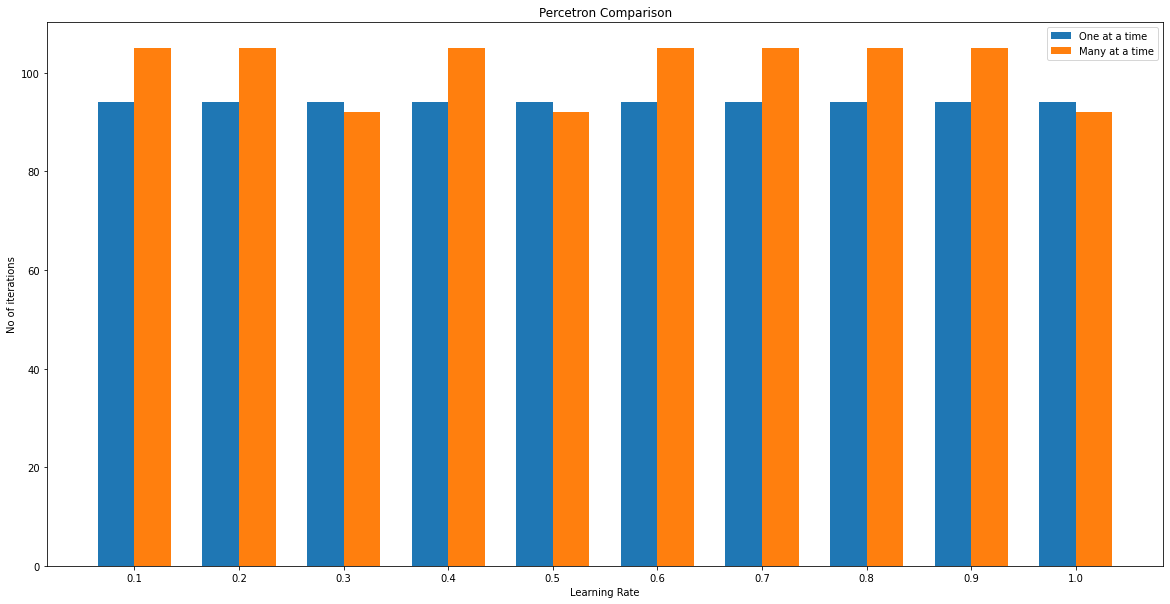

In [13]:
labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
one_at_time_zeros = one_at_zeros
many_at_time_zeros = many_at_zeros

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one_at_time_zeros, width, label='One at a time')
rects2 = ax.bar(x + width/2, many_at_time_zeros, width, label='Many at a time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of iterations')
ax.set_xlabel('Learning Rate')
ax.set_title('Percetron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.rcParams["figure.figsize"] = (20,10)

plt.show()

#### Randomly Initialized with Seed Fixed

In [15]:
## One at A Time
one_at_random = []
one_at_alpha = []
for alpha in np.arange(0.1, 1.1, 0.1):
    np.random.seed(10)
    w = np.random.random((1,6))
    cnt = 0
    flag = 0
    g = 0
    while cnt<200:
        cnt = cnt+1
        flag = 0
        for i in range(6):
            g = np.matmul(y[i, :],w.transpose())
            if g<=0:
                w = w+alpha*y[i, :]
            else:
                flag = flag+1
        if flag==6:
            break
    one_at_alpha.append(alpha)
    one_at_random.append(cnt)

## Many at A Time
many_at_random = []
for alpha in np.arange(0.1, 1.1, 0.1):
    np.random.seed(10)
    w2 = np.random.random((1, 6))
    alpha2 = 0.1
    flag2 = 0
    cnt2 = 0
    temp = 0
    g2 = 0
    while cnt2<200:
        cnt2 = cnt2+1
        flag2 = 0
        temp = 0
        for i in range(6):
            g2 = np.matmul(y[i, :], w2.transpose())
            if g2<=0:
                temp = temp + y[i, :]
            else:
                flag2 = flag2+1
        if flag2==6:
            break
        w2 = w2+alpha*temp
    many_at_random.append(cnt2)
df = pd.DataFrame({"Alpha (Learning Rate)":one_at_alpha, "One at a Time":one_at_random, "Many at a Time":many_at_random})
df

,Alpha (Learning Rate),One at a Time,Many at a Time
0,0.1,97,84
1,0.2,95,91
2,0.3,93,117
3,0.4,101,133
4,0.5,106,90
5,0.6,113,105
6,0.7,94,88
7,0.8,113,138
8,0.9,108,138
9,1.0,101,150


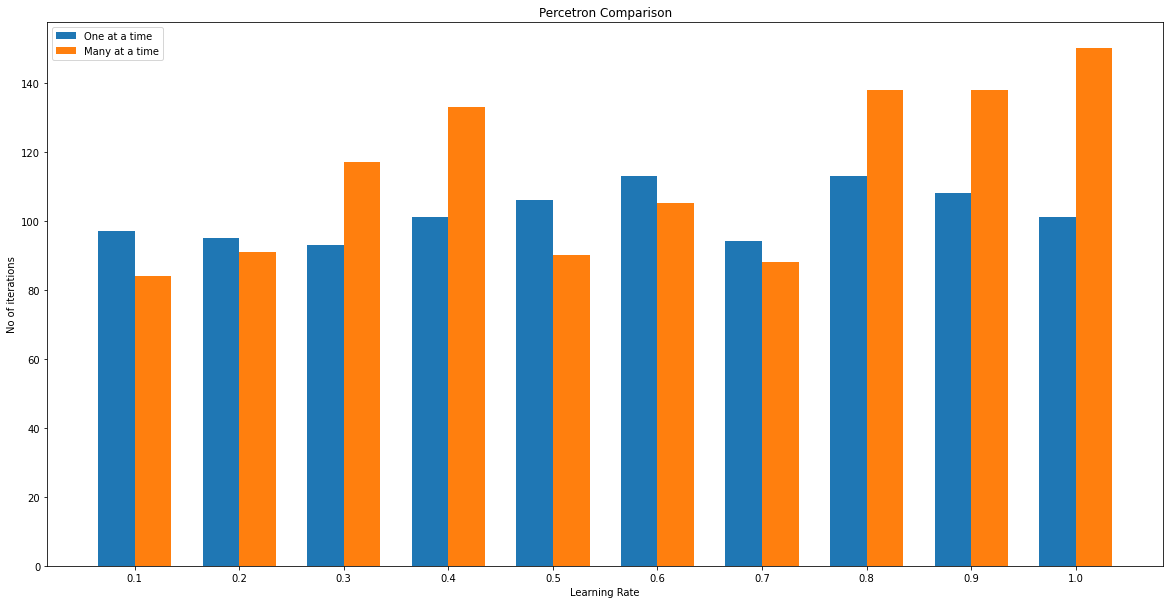

In [16]:
labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
one_at_time_random = one_at_random
many_at_time_random = many_at_random

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one_at_time_random, width, label='One at a time')
rects2 = ax.bar(x + width/2, many_at_time_random, width, label='Many at a time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of iterations')
ax.set_xlabel('Learning Rate')
ax.set_title('Percetron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.rcParams["figure.figsize"] = (20,10)

plt.show()